In [230]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [13]:
df = pd.read_csv('parkinson.csv')

In [14]:
df.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [18]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [19]:
df.shape

(756, 755)

In [20]:
df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [21]:
df.shape

(756, 755)

In [23]:
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [24]:
df.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

## Split in Train,Test 

In [25]:
X = df.drop('class',axis=1)
X.head(5)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [26]:
y = df['class']

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [105]:
X_train.shape

(604, 754)

In [106]:
X_test.shape

(152, 754)

In [107]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [108]:
X_train_scaled

array([[-0.09980996, -1.04748376,  0.08996154, ..., -0.62875844,
        -0.15602323,  0.09738933],
       [-0.56618026, -1.04748376,  0.53517456, ...,  0.17113249,
         0.2870022 ,  1.06071   ],
       [-1.27945247,  0.95466874,  0.12811427, ..., -0.65864777,
        -0.59220786,  0.48702066],
       ...,
       [ 1.14841641,  0.95466874,  0.55900534, ..., -0.54944254,
        -0.6437917 , -0.78205762],
       [ 0.83293062,  0.95466874,  0.50500456, ...,  1.31923034,
         2.16777441,  2.46358878],
       [ 1.4090351 ,  0.95466874,  0.52725053, ...,  0.68364917,
         0.76729177,  1.88216483]])

In [109]:
X_test_scaled

array([[ 1.24274604, -0.97402153,  0.2887207 , ...,  1.34569452,
         1.34081386, -0.25219529],
       [ 1.63105286, -0.97402153,  0.52515824, ..., -0.73831971,
        -0.85267721, -0.74113611],
       [ 0.10556179,  1.02667135,  0.40952598, ..., -0.77650717,
        -0.81637935, -0.75078431],
       ...,
       [ 1.24274604, -0.97402153,  0.54785868, ..., -0.6269786 ,
        -0.4762391 , -0.63879385],
       [ 0.43839621, -0.97402153,  0.34872776, ..., -0.74749528,
        -0.84864009, -0.75448086],
       [-0.92067765, -0.97402153, -0.71034203, ..., -0.7570574 ,
        -0.7488717 , -0.7202977 ]])

## SVM  Modelling 

In [110]:
#SVC : Classifier. (datapoints near to the hyperplane its perpendicular distance is found and summed up for all points 
#and maximised known as Support Vector Classifiers)
#Hyperplane seggregates into classes

In [111]:
#Kernel Function is a method used to take data as input and transform it into the required form of processing data

In [203]:
#C : penalty in error function to optimise results
svm_classifier = svm.SVC(kernel='poly', gamma='auto', C=5)
svm_classifier

SVC(C=5, gamma='auto', kernel='poly')

In [204]:
svm_classifier.fit(X_train_scaled,y_train)

SVC(C=5, gamma='auto', kernel='poly')

In [205]:
y_pred = svm_classifier.predict(X_test_scaled)

In [206]:
y_test

650    0
734    0
404    1
79     0
422    1
      ..
156    1
118    1
649    0
476    1
181    1
Name: class, Length: 152, dtype: int64

In [207]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

## Evaluation 

In [208]:
svm_classifier.score(X_test_scaled,y_test)

0.8157894736842105

In [209]:
svm_classifier.score(X_train_scaled,y_train)

0.9420529801324503

In [210]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 15,  23],
       [  5, 109]], dtype=int64)

<Figure size 360x360 with 0 Axes>

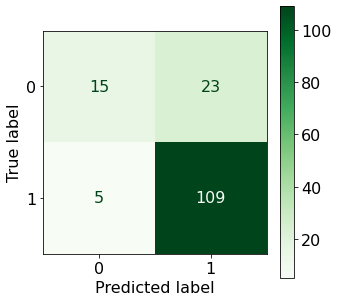

In [211]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_classifier.classes_,)
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
disp.plot(cmap='Greens')

In [212]:
accuracy_score(y_test,y_pred)

0.8157894736842105

In [213]:
deg = range(1,20)
test_score = []
for x in deg:
    svm_classifier = svm.SVC(kernel='poly', degree=x, gamma='auto', C=5)
    svm_classifier.fit(X_train_scaled,y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    test_score.append(svm_classifier.score(X_test_scaled,y_test))

In [214]:
test_score = [ 100* round(elem, 4) for elem in test_score ]
print(test_score)

[84.87, 86.18, 81.58, 77.63, 75.66000000000001, 75.66000000000001, 75.66000000000001, 76.32, 76.32, 76.32, 76.32, 76.32, 76.32, 76.32, 75.66000000000001, 75.0, 75.0, 75.0, 75.66000000000001]


<AxesSubplot:>

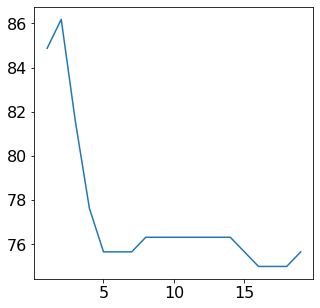

In [215]:
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.6)
sns.lineplot(x=deg,y=test_score)

In [216]:
svm_classifier1 = svm.SVC(kernel='poly', degree=2, gamma='auto', C=5)
svm_classifier1.fit(X_train_scaled,y_train)
y_pred = svm_classifier1.predict(X_test_scaled)

In [217]:
accuracy_score(y_test,y_pred)

0.8618421052631579

In [218]:
svm_classifier2 = svm.SVC(kernel='rbf',gamma='auto', C=4)
svm_classifier2.fit(X_train_scaled,y_train)
y_pred_ = svm_classifier2.predict(X_test_scaled)

In [219]:
accuracy_score(y_test,y_pred_)

0.881578947368421

In [220]:
C_range = range(1,21)
y_pred_rbf_scores = []
for val in C_range:
    svm_classifier2 = svm.SVC(kernel='rbf',gamma='auto', C=val)
    svm_classifier2.fit(X_train_scaled,y_train)
    y_pred_val = svm_classifier2.predict(X_test_scaled)
    y_pred_rbf_scores.append(accuracy_score(y_test,y_pred_val))

In [221]:
y_pred_rbf_scores

[0.8421052631578947,
 0.881578947368421,
 0.875,
 0.881578947368421,
 0.868421052631579,
 0.8618421052631579,
 0.8618421052631579,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368,
 0.8552631578947368]

<AxesSubplot:>

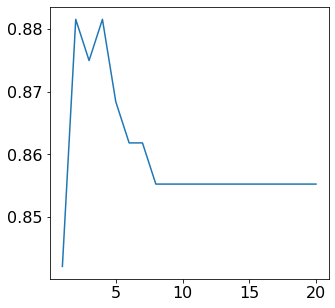

In [222]:
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.6)
sns.lineplot(x=C_range,y=y_pred_rbf_scores)

In [223]:
svm_classifier3 = svm.SVC(kernel='linear',gamma='auto', C=5)
svm_classifier3.fit(X_train_scaled,y_train)
y_pred_1 = svm_classifier3.predict(X_test_scaled)

In [224]:
accuracy_score(y_test,y_pred_1)

0.8092105263157895

In [225]:
svm_classifier4 = svm.SVC(kernel='sigmoid',gamma='auto', C=3)
svm_classifier4.fit(X_train_scaled,y_train)
y_pred_2 = svm_classifier4.predict(X_test_scaled)

In [226]:
accuracy_score(y_test,y_pred_2)

0.8421052631578947